**1. Importing the dependencies**

In [ ]:
!pip install catboost

In [ ]:
import numpy as np
import pandas as pd

# Tr·ª±c quan h√≥a d·ªØ li·ªáu
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import xgboost as xgb
# Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE

# Chia d·ªØ li·ªáu v√† ƒë√°nh gi√° m√¥ h√¨nh
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, validation_curve

# C√°c thu·∫≠t to√°n ph√¢n lo·∫°i
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# C√°c thu·∫≠t to√°n h·ªìi quy
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# ƒê√°nh gi√° m√¥ h√¨nh
from sklearn import metrics
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, precision_recall_curve,
    mean_squared_error, mean_absolute_error, r2_score
)

# X·ª≠ l√Ω c·∫£nh b√°o
import warnings
warnings.simplefilter(action="ignore")

# L∆∞u v√† t·∫£i m√¥ h√¨nh
import pickle


In [ ]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 28. Model with Survival Analysis

In [ ]:
from google.colab import files
uploaded = files.upload()

train_df = pd.read_csv('train_survival.csv')
test_df = pd.read_csv('test_survival.csv')

# T√°ch c√°c ƒë·∫∑c tr∆∞ng v√† gi√° tr·ªã churn t·ª´ c√°c file
X_train = train_df.drop(columns=['churn_value'])
y_train = train_df['churn_value']

X_test = test_df.drop(columns=['churn_value'])
y_test = test_df['churn_value']

Saving Merged_Churn_Dataset.csv to Merged_Churn_Dataset.csv
Saving survival_features_test.csv to survival_features_test.csv
Saving survival_features_train.csv to survival_features_train.csv
Saving test_survival.csv to test_survival.csv
Saving train_survival.csv to train_survival.csv


In [ ]:
survival_train = pd.read_csv("survival_features_train.csv")
survival_test = pd.read_csv("survival_features_test.csv")

# Merge l·∫°i v√†o X_train, X_test b·∫±ng index (th·ª© t·ª± h√†ng)
X_train_final = pd.concat([X_train.reset_index(drop=True), survival_train], axis=1)
X_test_final = pd.concat([X_test.reset_index(drop=True), survival_test], axis=1)


In [ ]:
X_train_final

gender    age  under_30  senior_citizen  partner  dependents  number_of_dependents  tenure  \
0          0 -0.150         0               0        1           0                 0.000      60   
1          1 -0.150         0               0        0           1                 3.000      12   
2          0 -0.687         0               0        0           0                 0.000       2   
3          1 -0.687         0               0        1           0                 0.000      33   
4          0  0.387         0               0        0           1                 1.000      14   
...      ...    ...       ...             ...      ...         ...                   ...     ...   
5629       0  0.149         0               0        1           1                 2.000      22   
5630       0 -1.284         1               0        1           0                 0.000      42   
5631       1  0.149         0               0        0           0                 0.000      20   
5632       0 -0.269         0               0        1           1                 3.000      24   
5633       0  0.328         0               0        0           0                 0.000      10   

      internet_service  phone_service  multiple_lines  avg_monthly_gb_download  unlimited_data  \
0                    1              1               1                    0.083               1   
1                    0              1               0                   -0.708               0   
2                    1              1               0                    0.333               1   
3                    1              1               0                    0.542               1   
4                    1              1               1                    0.208               1   
...                ...            ...             ...                      ...             ...   
5629                 0              1               0                   -0.708               0   
5630                 1              1               1                    0.417               1   
5631                 1              1               1                    0.333               1   
5632                 0              1               1                   -0.708               0   
5633                 0              1               0                   -0.708               0   

      offer  number_of_referrals  online_security  online_backup  device_protection  \
0         2                2.667                1              1                  0   
1         4                0.000                0              0                  0   
2         0                0.000                1              0                  1   
3         3                2.333                1              0                  1   
4         4                0.000                1              0                  0   
...     ...                  ...              ...            ...                ...   
5629      0                2.667                0              0                  0   
5630      0                0.333                0              0                  0   
5631      4                0.000                0              0                  0   
5632      0                2.333                0              0                  0   
5633      0                0.000                0              0                  0   

      premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  \
0                        0             0                 1                1              2   
1                        0             0                 0                0              3   
2                        0             0                 0                0              2   
3                        0             1                 1                1              0   
4                        1             0                 0                0              2   
...                

In [ ]:
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

# One-hot encoding cho c·ªôt 'hazard_group' b·∫±ng pd.get_dummies
X_train_final = pd.get_dummies(X_train_final, columns=['hazard_group'], drop_first=False)
X_test_final = pd.get_dummies(X_test_final, columns=['hazard_group'], drop_first=False)

# S·ª≠ d·ª•ng RobustScaler cho c√°c c·ªôt s·ªë li·ªáu
columns_to_scale = ['hazard_score', 'baseline_hazard', 'survival_prob_3m', 'survival_prob_6m', 'survival_prob_12m']

# Kh·ªüi t·∫°o RobustScaler
scaler = RobustScaler()

# Chu·∫©n h√≥a c√°c c·ªôt cho c·∫£ train v√† test
X_train_final[columns_to_scale] = scaler.fit_transform(X_train_final[columns_to_scale])
X_test_final[columns_to_scale] = scaler.transform(X_test_final[columns_to_scale])



In [ ]:
X_train_final.head()

gender    age  under_30  senior_citizen  partner  dependents  number_of_dependents  tenure  \
0       0 -0.150         0               0        1           0                 0.000      60   
1       1 -0.150         0               0        0           1                 3.000      12   
2       0 -0.687         0               0        0           0                 0.000       2   
3       1 -0.687         0               0        1           0                 0.000      33   
4       0  0.387         0               0        0           1                 1.000      14   

   internet_service  phone_service  multiple_lines  avg_monthly_gb_download  unlimited_data  \
0                 1              1               1                    0.083               1   
1                 0              1               0                   -0.708               0   
2                 1              1               0                    0.333               1   
3                 1              1               0                    0.542               1   
4                 1              1               1                    0.208               1   

   offer  number_of_referrals  online_security  online_backup  device_protection  \
0      2                2.667                1              1                  0   
1      4                0.000                0              0                  0   
2      0                0.000                1              0                  1   
3      3                2.333                1              0                  1   
4      4                0.000                1              0                  0   

   premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  contract  \
0                     0             0                 1                1              2         0   
1                     0             0                 0                0              3         2   
2                     0             0                 0                0              2         0   
3                     0             1                 1                1              0         1   
4                     1             0                 0                0              2         0   

   paperless_billing  payment_method  monthly_charges  avg_monthly_long_distance_charges  \
0                  1               1            0.975                             -0.480   
1                  0               0           -1.509                             -0.371   
2                  1               2            0.521                              0.806   
3                  0               1            0.332                              1.676   
4                  1               3            0.706                              1.603   

   total_charges  total_refunds  total_extra_data_charges  total_long_distance_charges  city  \
0          1.410          0.000                     0.000                        0.474   349   
1         -0.913          0.000                     0.000                       -0.174   554   
2         -0.946          0.000                     0.000                       -0.295   989   
3          0.076          0.000                     0.000                        1.080   368   
4         -0.493          0.000                     0.000                        0.238    52   

   zip_code  total_population  latitude  longitude  New_total_services  New_flag_auto_payment  \
0     0.940            -0.369     0.679     -0.713                   1                      1   
1    -1.860             0.870    -0.858      0.733                   0                      1   
2    -0.011            -0.285    -0.268     -0.456                   1                      0   
3    -1.229             0.706    -0.835      0.701                   1                      1   
4    -0.033            -0.496    -0.409     -0.451                   1                      0   

   New_avg_service_fee  

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from catboost import CatBoostClassifier
import numpy as np
import pandas as pd

# Chuy·ªÉn ƒë·ªïi categorical sang numeric b·∫±ng one-hot encoding
X_train_encoded = pd.get_dummies(X_train_final, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_final, drop_first=True)

# ƒê·∫£m b·∫£o train v√† test c√≥ c√πng s·ªë l∆∞·ª£ng c·ªôt
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# S·ªë c·ª•m kh√°ch h√†ng
n_clusters = 4

# KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X_train_final['kmeans_cluster'] = kmeans.fit_predict(X_train_encoded)
X_test_final['kmeans_cluster'] = kmeans.predict(X_test_encoded)

# CatBoost model
catboost_model = CatBoostClassifier(verbose=False, random_state=42)
catboost_model.fit(X_train_encoded, y_train)

# Optimal threshold
def find_optimal_threshold(model, X_val, y_val):
    y_proba = model.predict_proba(X_val)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

optimal_threshold = find_optimal_threshold(catboost_model, X_train_encoded, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh
y_proba_test = catboost_model.predict_proba(X_test_encoded)[:, 1]
y_pred_test = (y_proba_test >= optimal_threshold).astype(int)

# K·∫øt qu·∫£
print("\nüìä Final CatBoost Model (with K-Means) Performance")
print(classification_report(y_test, y_pred_test))
print(f"üéØ Optimal Threshold: {optimal_threshold:.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba_test):.4f}")


üìä Final CatBoost Model (with K-Means) Performance
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1035
           1       0.70      0.74      0.72       374

    accuracy                           0.85      1409
   macro avg       0.80      0.81      0.81      1409
weighted avg       0.85      0.85      0.85      1409

üéØ Optimal Threshold: 0.3985
AUC Score: 0.9129


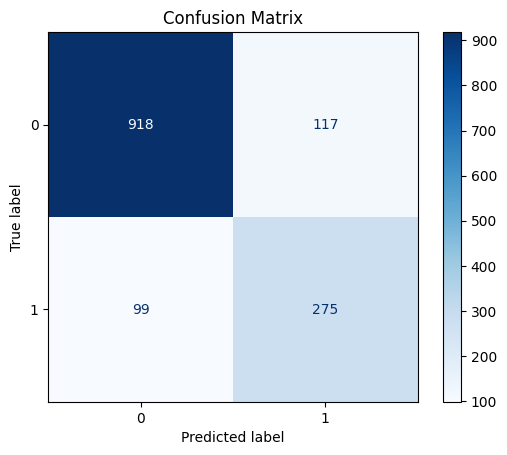

Final CatBoost Model Performance on Test Set
---------------------------------------------
Accuracy : 0.8467
Recall   : 0.7353
Precision: 0.7015
F1 Score : 0.7180
AUC      : 0.9129


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
print("Final CatBoost Model Performance on Test Set")
print("---------------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {roc_auc:.4f}")

In [ ]:
X_train_encoded

gender    age  under_30  senior_citizen  partner  dependents  number_of_dependents  tenure  \
0          0 -0.150         0               0        1           0                 0.000      60   
1          1 -0.150         0               0        0           1                 3.000      12   
2          0 -0.687         0               0        0           0                 0.000       2   
3          1 -0.687         0               0        1           0                 0.000      33   
4          0  0.387         0               0        0           1                 1.000      14   
...      ...    ...       ...             ...      ...         ...                   ...     ...   
5629       0  0.149         0               0        1           1                 2.000      22   
5630       0 -1.284         1               0        1           0                 0.000      42   
5631       1  0.149         0               0        0           0                 0.000      20   
5632       0 -0.269         0               0        1           1                 3.000      24   
5633       0  0.328         0               0        0           0                 0.000      10   

      internet_service  phone_service  multiple_lines  avg_monthly_gb_download  unlimited_data  \
0                    1              1               1                    0.083               1   
1                    0              1               0                   -0.708               0   
2                    1              1               0                    0.333               1   
3                    1              1               0                    0.542               1   
4                    1              1               1                    0.208               1   
...                ...            ...             ...                      ...             ...   
5629                 0              1               0                   -0.708               0   
5630                 1              1               1                    0.417               1   
5631                 1              1               1                    0.333               1   
5632                 0              1               1                   -0.708               0   
5633                 0              1               0                   -0.708               0   

      offer  number_of_referrals  online_security  online_backup  device_protection  \
0         2                2.667                1              1                  0   
1         4                0.000                0              0                  0   
2         0                0.000                1              0                  1   
3         3                2.333                1              0                  1   
4         4                0.000                1              0                  0   
...     ...                  ...              ...            ...                ...   
5629      0                2.667                0              0                  0   
5630      0                0.333                0              0                  0   
5631      4                0.000                0              0                  0   
5632      0                2.333                0              0                  0   
5633      0                0.000                0              0                  0   

      premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  \
0                        0             0                 1                1              2   
1                        0             0                 0                0              3   
2                        0             0                 0                0              2   
3                        0             1                 1                1              0   
4                        1             0                 0                0              2   
...                

## 29. Hyper Tuning

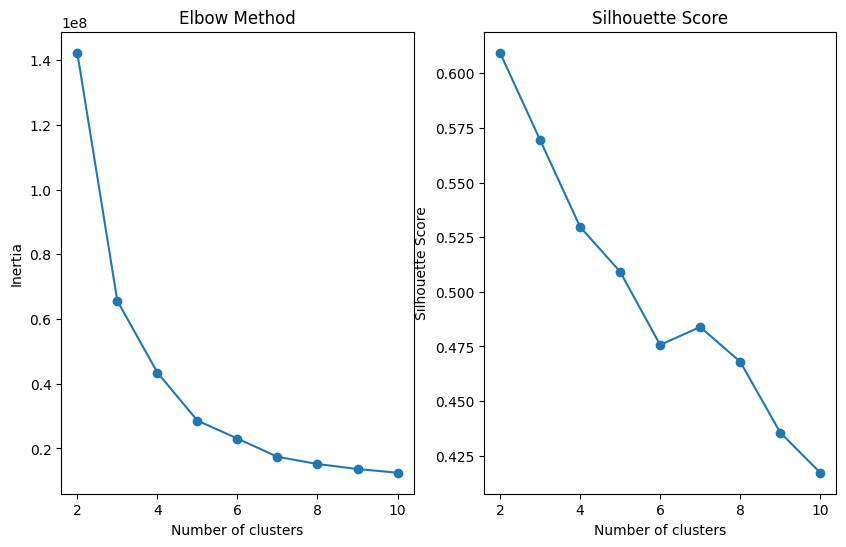

([142261649.87829036,
  65605622.91118072,
  43449032.532424085,
  28601975.63619118,
  23046498.762704898,
  17410449.78221644,
  15183976.928450186,
  13636944.974375503,
  12492444.795683803],
 [0.6094159786738924,
  0.5695384726784051,
  0.529751428718832,
  0.5092259924188745,
  0.4757323780731075,
  0.4839197728249783,
  0.46801774384742567,
  0.43564149651562356,
  0.4172468898565261])

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, silhouette_score


X_train_encoded = pd.get_dummies(X_train_final, drop_first=True)
X_test_encoded = pd.get_dummies(X_test_final, drop_first=True)

# ƒê·∫£m b·∫£o train v√† test c√≥ c√πng s·ªë l∆∞·ª£ng c·ªôt
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# S·ª≠ d·ª•ng Elbow Method ƒë·ªÉ t√¨m s·ªë c·ª•m t·ªët
def find_optimal_clusters(X_train):
    inertia = []
    silhouette_scores = []
    for n_clusters in range(2, 11):  # Ki·ªÉm tra t·ª´ 2 ƒë·∫øn 10 c·ª•m
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X_train)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))

    # V·∫Ω ƒë·ªì th·ªã Elbow Method
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

    # V·∫Ω ƒë·ªì th·ªã Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(range(2, 11), silhouette_scores, marker='o')
    plt.title('Silhouette Score')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

    plt.show()

    return inertia, silhouette_scores

# T√¨m s·ªë c·ª•m t·ªëi ∆∞u
find_optimal_clusters(X_train_encoded)

In [ ]:
n_clusters = 4

# KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
X_train_final['kmeans_cluster'] = kmeans.fit_predict(X_train_encoded)
X_test_final['kmeans_cluster'] = kmeans.predict(X_test_encoded)

# CatBoost model with selected hyperparameters
catboost_model = CatBoostClassifier(
    learning_rate=0.01,
    iterations=1000,
    depth=6,
    random_strength=0.1,
    bagging_temperature =0.2,
    l2_leaf_reg = 3,
    colsample_bylevel = 1.0,
    verbose=False,
    random_state=42
)

# Ti·∫øn h√†nh training v·ªõi model ƒë√£ ch·ªçn tham s·ªë
catboost_model.fit(X_train_encoded, y_train)

# T√¨m optimal threshold
def find_optimal_threshold(model, X_val, y_val):
    y_proba = model.predict_proba(X_val)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

optimal_threshold = find_optimal_threshold(catboost_model, X_train_encoded, y_train)

# ƒê√°nh gi√° m√¥ h√¨nh
y_proba_test = catboost_model.predict_proba(X_test_encoded)[:, 1]
y_pred_test = (y_proba_test >= optimal_threshold).astype(int)

# K·∫øt qu·∫£
print("\nüìä Final CatBoost Model (with K-Means) Performance")
print(classification_report(y_test, y_pred_test))
print(f"üéØ Optimal Threshold: {optimal_threshold:.4f}")
print(f"AUC Score: {roc_auc_score(y_test, y_proba_test):.4f}")


üìä Final CatBoost Model (with K-Means) Performance
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1035
           1       0.74      0.72      0.73       374

    accuracy                           0.86      1409
   macro avg       0.82      0.81      0.82      1409
weighted avg       0.86      0.86      0.86      1409

üéØ Optimal Threshold: 0.4439
AUC Score: 0.9128


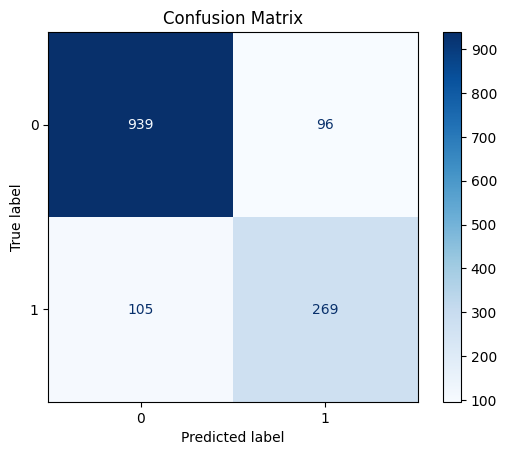

Final CatBoost Model Performance on Test Set
---------------------------------------------
Accuracy : 0.8573
Recall   : 0.7193
Precision: 0.7370
F1 Score : 0.7280
AUC      : 0.9128


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=catboost_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Performance Metrics
accuracy = accuracy_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
print("Final CatBoost Model Performance on Test Set")
print("---------------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {roc_auc:.4f}")

In [ ]:
def plot_importance(model, features, num=len(X_train_final), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})

    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)  # ƒêi·ªÅu ch·ªânh k√≠ch th∆∞·ªõc font ch·ªØ

    # V·∫Ω bi·ªÉu ƒë·ªì thanh
    ax = sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])

    plt.title(f'Feature Importance - {model.__class__.__name__}')

    # TƒÉng kho·∫£ng c√°ch gi·ªØa c√°c nh√£n b·∫±ng c√°ch ƒëi·ªÅu ch·ªânh kho·∫£ng c√°ch tr√™n tr·ª•c y
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)  # TƒÉng k√≠ch th∆∞·ªõc font ch·ªØ c·ªßa nh√£n y
    ax.set_yticks(range(len(feature_imp)))  # ƒê·∫£m b·∫£o c√°c tick tr√™n tr·ª•c y c√°ch nhau ƒë·ªìng ƒë·ªÅu

    plt.tight_layout()
    plt.show(block=True)

    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

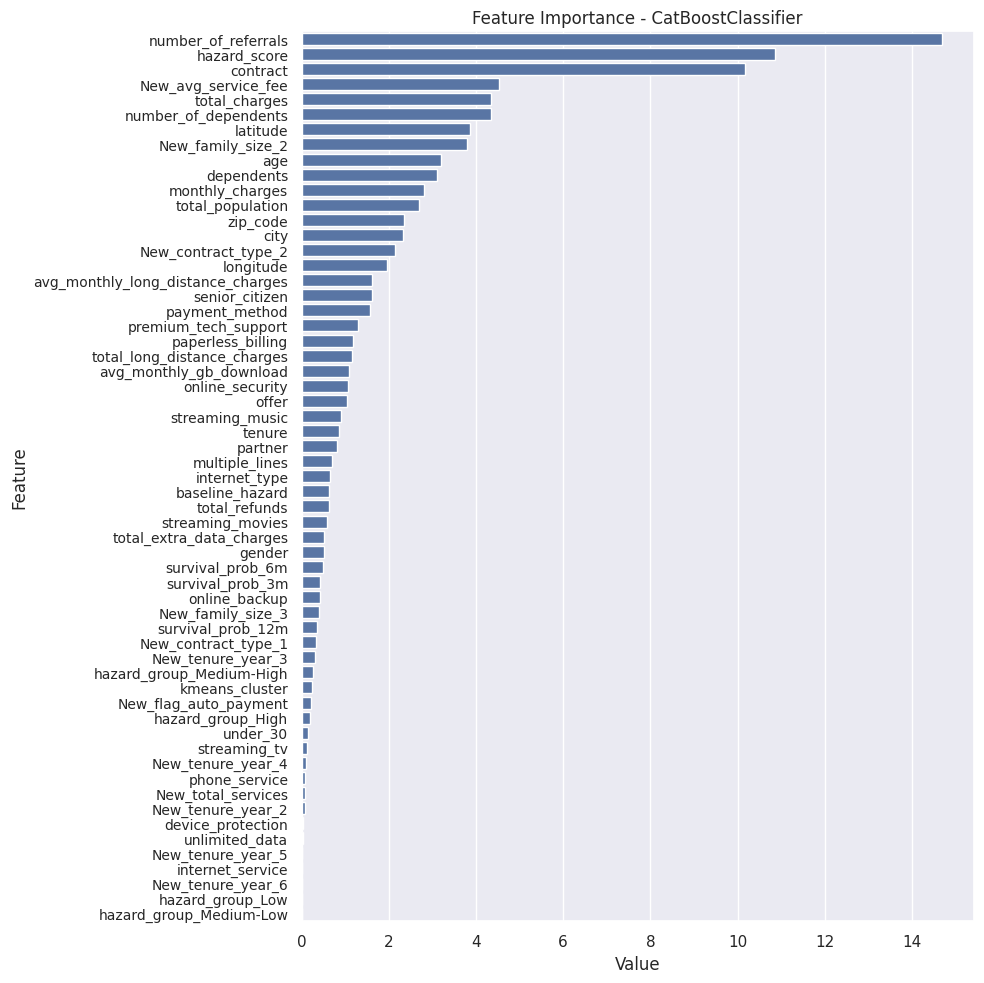

In [ ]:
plot_importance(catboost_model, X_train_final)

In [ ]:
X_train_encoded

gender    age  under_30  senior_citizen  partner  dependents  number_of_dependents  tenure  \
0          0 -0.150         0               0        1           0                 0.000      60   
1          1 -0.150         0               0        0           1                 3.000      12   
2          0 -0.687         0               0        0           0                 0.000       2   
3          1 -0.687         0               0        1           0                 0.000      33   
4          0  0.387         0               0        0           1                 1.000      14   
...      ...    ...       ...             ...      ...         ...                   ...     ...   
5629       0  0.149         0               0        1           1                 2.000      22   
5630       0 -1.284         1               0        1           0                 0.000      42   
5631       1  0.149         0               0        0           0                 0.000      20   
5632       0 -0.269         0               0        1           1                 3.000      24   
5633       0  0.328         0               0        0           0                 0.000      10   

      internet_service  phone_service  multiple_lines  avg_monthly_gb_download  unlimited_data  \
0                    1              1               1                    0.083               1   
1                    0              1               0                   -0.708               0   
2                    1              1               0                    0.333               1   
3                    1              1               0                    0.542               1   
4                    1              1               1                    0.208               1   
...                ...            ...             ...                      ...             ...   
5629                 0              1               0                   -0.708               0   
5630                 1              1               1                    0.417               1   
5631                 1              1               1                    0.333               1   
5632                 0              1               1                   -0.708               0   
5633                 0              1               0                   -0.708               0   

      offer  number_of_referrals  online_security  online_backup  device_protection  \
0         2                2.667                1              1                  0   
1         4                0.000                0              0                  0   
2         0                0.000                1              0                  1   
3         3                2.333                1              0                  1   
4         4                0.000                1              0                  0   
...     ...                  ...              ...            ...                ...   
5629      0                2.667                0              0                  0   
5630      0                0.333                0              0                  0   
5631      4                0.000                0              0                  0   
5632      0                2.333                0              0                  0   
5633      0                0.000                0              0                  0   

      premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  \
0                        0             0                 1                1              2   
1                        0             0                 0                0              3   
2                        0             0                 0                0              2   
3                        0             1                 1                1              0   
4                        1             0                 0                0              2   
...                

## 30. Accelerated Failure Time in Training set

In [ ]:
from google.colab import files
uploaded = files.upload()

merged_churn_data = pd.read_csv('Merged_Churn_Dataset.csv')

In [ ]:
merged_churn_data

customer_id  gender  age under_30 senior_citizen partner dependents  number_of_dependents  \
0     0002-ORFBO  Female   37       No             No     Yes         No                     0   
1     0003-MKNFE    Male   46       No             No      No         No                     0   
2     0004-TLHLJ    Male   50       No             No      No         No                     0   
3     0011-IGKFF    Male   78       No            Yes     Yes         No                     0   
4     0013-EXCHZ  Female   75       No            Yes     Yes         No                     0   
...          ...     ...  ...      ...            ...     ...        ...                   ...   
7038  9987-LUTYD  Female   20      Yes             No      No         No                     0   
7039  9992-RRAMN    Male   40       No             No     Yes         No                     0   
7040  9992-UJOEL    Male   22      Yes             No      No         No                     0   
7041  9993-LHIEB    Male   21      Yes             No     Yes         No                     0   
7042  9995-HOTOH    Male   36       No             No     Yes         No                     0   

     married  tenure internet_service phone_service multiple_lines  avg_monthly_gb_download  \
0        Yes       9              Yes           Yes             No                       16   
1         No       9              Yes           Yes            Yes                       10   
2         No       4              Yes           Yes             No                       30   
3        Yes      13              Yes           Yes             No                        4   
4        Yes       3              Yes           Yes             No                       11   
...      ...     ...              ...           ...            ...                      ...   
7038      No      13              Yes           Yes             No                       59   
7039     Yes      22              Yes           Yes            Yes                       17   
7040      No       2              Yes           Yes             No                       51   
7041     Yes      67              Yes           Yes             No                       58   
7042     Yes      63              Yes            No             No                        5   

     unlimited_data    offer referred_a_friend  number_of_referrals online_security online_backup  \
0               Yes      NaN               Yes                    2              No           Yes   
1                No      NaN                No                    0              No            No   
2               Yes  Offer E                No                    0              No            No   
3               Yes  Offer D               Yes                    1              No           Yes   
4               Yes      NaN               Yes                    3              No            No   
...             ...      ...               ...                  ...             ...           ...   
7038            Yes  Offer D                No                    0             Yes            No   
7039            Yes  Offer D               Yes                    1              No            No   
7040            Yes  Offer E                No                    0              No           Yes   
7041            Yes  Offer A               Yes                    5             Yes            No   
7042            Yes      NaN               Yes                    1             Yes           Yes   

     device_protection premium_tech_support streaming_tv streaming_movies streaming_music  \
0                   No                  Yes          Yes               No              No   
1                   No                   No           No              Yes             Yes   
2                  Yes                   No           No               No              No   
3                  Yes                   No          Yes              Yes              No   
4        

In [ ]:
customer_ids = merged_churn_data['customer_id']

In [ ]:
X = merged_churn_data.drop(columns=['churn_value', 'customer_id'])  # Ch·ªçn t·∫•t c·∫£ c√°c c·ªôt ƒë·∫∑c tr∆∞ng (tr·ª´ 'churn_value' v√† 'customer_id')
y = merged_churn_data['churn_value']  # Ch·ªçn c·ªôt 'churn_value' l√†m nh√£n

# **B∆∞·ªõc 2: Chia t·∫≠p d·ªØ li·ªáu th√†nh Train v√† Test (test_size=0.2)**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# **B∆∞·ªõc 3: L·∫•y customer_id t·ª´ merged_churn_data**
# D√πng ch·ªâ s·ªë t·ª´ X_train v√† X_test ƒë·ªÉ l·∫•y `customer_id` t·ª´ merged_churn_data
customer_ids_train = merged_churn_data.loc[X_train.index, 'customer_id']
customer_ids_test = merged_churn_data.loc[X_test.index, 'customer_id']

In [ ]:
customer_ids_train.head()

3793    5334-JLAXU
3192    4573-JKNAE
4922    6923-JHPMP
3926    5524-KHNJP
3859    5433-KYGHE
Name: customer_id, dtype: object

In [ ]:
X_train['label_lower_bound'] = X_train['tenure']  # S·ª≠ d·ª•ng gi√° tr·ªã 'tenure' cho label_lower_bound

# N·∫øu churn_value == 0 (right-censored), th√¨ label_upper_bound = Inf
X_train['label_upper_bound'] = X_train['tenure'].where(y_train == 0, float('inf'))  # Right-censored (churn = 0)

# C·∫≠p nh·∫≠t l·∫°i label_upper_bound cho ƒë√∫ng
max_tenure = X_train['tenure'].max()  # L·∫•y gi√° tr·ªã l·ªõn nh·∫•t trong 'tenure'
X_train['label_upper_bound'] = X_train['tenure'].where(y_train == 1, max_tenure)  # C·∫≠p nh·∫≠t cho d·ªØ li·ªáu right-censored

X_train['label_upper_bound'] = X_train['label_upper_bound'].where(X_train['label_lower_bound'] != X_train['label_upper_bound'], 0.0000001)

In [ ]:
X_train

gender  age under_30 senior_citizen partner dependents  number_of_dependents married  \
3793  Female   44       No             No     Yes         No                     0     Yes   
3192    Male   44       No             No      No        Yes                     3      No   
4922  Female   35       No             No      No         No                     0      No   
3926    Male   35       No             No     Yes         No                     0     Yes   
3859  Female   53       No             No      No        Yes                     1      No   
...      ...  ...      ...            ...     ...        ...                   ...     ...   
6331  Female   49       No             No     Yes        Yes                     2     Yes   
6146  Female   25      Yes             No     Yes         No                     0     Yes   
4485    Male   49       No             No      No         No                     0      No   
2739  Female   42       No             No     Yes        Yes                     3     Yes   
5679  Female   52       No             No      No         No                     0      No   

      tenure internet_service phone_service multiple_lines  avg_monthly_gb_download  \
3793      60              Yes           Yes            Yes                       19   
3192      12               No           Yes             No                        0   
4922       2              Yes           Yes             No                       25   
3926      33              Yes           Yes             No                       30   
3859      14              Yes           Yes            Yes                       22   
...      ...              ...           ...            ...                      ...   
6331      22               No           Yes             No                        0   
6146      42              Yes           Yes            Yes                       27   
4485      20              Yes           Yes            Yes                       25   
2739      24               No           Yes            Yes                        0   
5679      10               No           Yes             No                        0   

     unlimited_data    offer referred_a_friend  number_of_referrals online_security online_backup  \
3793            Yes  Offer B               Yes                    8             Yes           Yes   
3192             No  Offer D                No                    0              No            No   
4922            Yes      NaN                No                    0             Yes            No   
3926            Yes  Offer C               Yes                    7             Yes            No   
3859            Yes  Offer D                No                    0             Yes            No   
...             ...      ...               ...                  ...             ...           ...   
6331             No      NaN               Yes                    8              No            No   
6146            Yes      NaN               Yes                    1              No            No   
4485            Yes  Offer D                No                    0              No            No   
2739             No      NaN               Yes                    7              No            No   
5679             No      NaN                No                    0              No            No   

     device_protection premium_tech_support streaming_tv streaming_movies streaming_music  \
3793                No                   No           No              Yes             Yes   
3192                No                   No           No               No              No   
4922               Yes                   No           No               No              No   
3926               Yes                   No          Yes              Yes             Yes   
3859                No                  Yes           No               No              No   
...                ...                  ...          ...     

In [ ]:
print(X_train[['label_lower_bound', 'label_upper_bound']].head(30))

      label_lower_bound  label_upper_bound
3793                 60             72.000
3192                 12             72.000
4922                  2             72.000
3926                 33             72.000
3859                 14             72.000
2695                 72              0.000
2669                 30             72.000
188                   5             72.000
5804                 69             72.000
2284                 58             72.000
2666                 21             72.000
6958                 21             72.000
3999                 53             72.000
2794                 72              0.000
3154                 54             72.000
3028                 20             72.000
5482                 60             72.000
331                  25             72.000
10                   54             72.000
4617                 15             72.000
6297                 21             72.000
6263                 10             72.000
3796       

In [ ]:
#  Hu·∫•n luy·ªán m√¥ h√¨nh AFT v·ªõi XGBoost**
params = {
    "objective": "survival:aft",
    "eval_metric": "aft-nloglik",
    "aft_loss_distribution": "normal",
    "aft_loss_distribution_scale": 1.20,
    "tree_method": "hist",
    "learning_rate": 0.05,
    "max_depth": 4
}

# D·ª± ƒëo√°n th·ªùi gian churn cho t·∫•t c·∫£ kh√°ch h√†ng trong t·∫≠p hu·∫•n luy·ªán
dtrain = xgb.DMatrix(X_train_encoded)  # T·∫°o DMatrix t·ª´ X_train_encoded
dtrain.set_float_info('label_lower_bound', X_train['label_lower_bound'])
dtrain.set_float_info('label_upper_bound', X_train['label_upper_bound'])

# Hu·∫•n luy·ªán m√¥ h√¨nh
aft_model = xgb.train(params, dtrain, num_boost_round=200)

# L∆∞u m√¥ h√¨nh AFT
with open("aft_model.pkl", "wb") as f:
    pickle.dump(aft_model, f)

# L·∫•y customer_id t·ª´ merged_churn_data**
customer_ids_train = merged_churn_data.loc[X_train.index, 'customer_id']

# D·ª± ƒëo√°n th·ªùi gian churn cho t·∫•t c·∫£ kh√°ch h√†ng trong t·∫≠p hu·∫•n luy·ªán**
dtrain = xgb.DMatrix(X_train_encoded)  # T·∫°o DMatrix t·ª´ X_train_encoded
predicted_time_to_churn = aft_model.predict(dtrain)

# In ra k·∫øt qu·∫£ d·ª± ƒëo√°n cho c√°c kh√°ch h√†ng trong t·∫≠p hu·∫•n luy·ªán**
for i, pred in enumerate(predicted_time_to_churn[:30]):
    customer_id = customer_ids_train.iloc[i]  # L·∫•y customer_id t·ª´ merged_churn_data
    print(f"Kh√°ch h√†ng {customer_id} s·∫Ω churn sau kho·∫£ng {pred:.2f} th√°ng.")

Kh√°ch h√†ng 5334-JLAXU s·∫Ω churn sau kho·∫£ng 58.59 th√°ng.
Kh√°ch h√†ng 4573-JKNAE s·∫Ω churn sau kho·∫£ng 29.65 th√°ng.
Kh√°ch h√†ng 6923-JHPMP s·∫Ω churn sau kho·∫£ng 2.29 th√°ng.
Kh√°ch h√†ng 5524-KHNJP s·∫Ω churn sau kho·∫£ng 50.82 th√°ng.
Kh√°ch h√†ng 5433-KYGHE s·∫Ω churn sau kho·∫£ng 18.39 th√°ng.
Kh√°ch h√†ng 3831-YCPUO s·∫Ω churn sau kho·∫£ng 2.03 th√°ng.
Kh√°ch h√†ng 3794-NFNCH s·∫Ω churn sau kho·∫£ng 45.22 th√°ng.
Kh√°ch h√†ng 0303-WMMRN s·∫Ω churn sau kho·∫£ng 13.48 th√°ng.
Kh√°ch h√†ng 8169-SAEJD s·∫Ω churn sau kho·∫£ng 64.58 th√°ng.
Kh√°ch h√†ng 3259-QMXUN s·∫Ω churn sau kho·∫£ng 64.09 th√°ng.
Kh√°ch h√†ng 3787-TRIAL s·∫Ω churn sau kho·∫£ng 24.73 th√°ng.
Kh√°ch h√†ng 9867-XOBQA s·∫Ω churn sau kho·∫£ng 45.43 th√°ng.
Kh√°ch h√†ng 5642-MHDQT s·∫Ω churn sau kho·∫£ng 57.58 th√°ng.
Kh√°ch h√†ng 3976-HXHCE s·∫Ω churn sau kho·∫£ng 2.36 th√°ng.
Kh√°ch h√†ng 4525-VZCZG s·∫Ω churn sau kho·∫£ng 56.59 th√°ng.
Kh√°ch h√†ng 4329-YPDDQ s·∫Ω churn sau kho·∫£ng 19.76 th√°ng.
Kh√°ch h√†n

#### N·∫øu lower_bound = upper_bound

In [ ]:
for i, pred in enumerate(predicted_time_to_churn[:30]):
    customer_id = customer_ids_train.iloc[i]
    # Ki·ªÉm tra n·∫øu label_upper_bound == label_lower_bound
    if X_train['label_upper_bound'].iloc[i] == 0.0000001:
        print(f"Kh√°ch h√†ng {customer_id} ƒë√£ churn ngay l·∫≠p t·ª©c sau 0 th√°ng.")
    else:
        print(f"Kh√°ch h√†ng {customer_id} s·∫Ω churn sau kho·∫£ng {pred:.2f} th√°ng.")

Kh√°ch h√†ng 5334-JLAXU s·∫Ω churn sau kho·∫£ng 58.59 th√°ng.
Kh√°ch h√†ng 4573-JKNAE s·∫Ω churn sau kho·∫£ng 29.65 th√°ng.
Kh√°ch h√†ng 6923-JHPMP s·∫Ω churn sau kho·∫£ng 2.29 th√°ng.
Kh√°ch h√†ng 5524-KHNJP s·∫Ω churn sau kho·∫£ng 50.82 th√°ng.
Kh√°ch h√†ng 5433-KYGHE s·∫Ω churn sau kho·∫£ng 18.39 th√°ng.
Kh√°ch h√†ng 3831-YCPUO ƒë√£ churn ngay l·∫≠p t·ª©c sau 0 th√°ng.
Kh√°ch h√†ng 3794-NFNCH s·∫Ω churn sau kho·∫£ng 45.22 th√°ng.
Kh√°ch h√†ng 0303-WMMRN s·∫Ω churn sau kho·∫£ng 13.48 th√°ng.
Kh√°ch h√†ng 8169-SAEJD s·∫Ω churn sau kho·∫£ng 64.58 th√°ng.
Kh√°ch h√†ng 3259-QMXUN s·∫Ω churn sau kho·∫£ng 64.09 th√°ng.
Kh√°ch h√†ng 3787-TRIAL s·∫Ω churn sau kho·∫£ng 24.73 th√°ng.
Kh√°ch h√†ng 9867-XOBQA s·∫Ω churn sau kho·∫£ng 45.43 th√°ng.
Kh√°ch h√†ng 5642-MHDQT s·∫Ω churn sau kho·∫£ng 57.58 th√°ng.
Kh√°ch h√†ng 3976-HXHCE ƒë√£ churn ngay l·∫≠p t·ª©c sau 0 th√°ng.
Kh√°ch h√†ng 4525-VZCZG s·∫Ω churn sau kho·∫£ng 56.59 th√°ng.
Kh√°ch h√†ng 4329-YPDDQ s·∫Ω churn sau kho·∫£ng 19.76 th√°ng.
K

## 31. Accelerated Failure Time in Testing set

In [ ]:
X_test_encoded

gender    age  under_30  senior_citizen  partner  dependents  number_of_dependents  tenure  \
0          0 -1.583         1               0        1           0                 0.000      21   
1          1  1.701         0               1        0           0                 0.000      11   
2          1  1.820         0               1        0           0                 0.000       4   
3          1 -0.926         0               0        0           0                 0.000       5   
4          1 -0.866         0               0        1           1                 1.000      72   
...      ...    ...       ...             ...      ...         ...                   ...     ...   
1404       0 -0.687         0               0        0           0                 0.000       1   
1405       0  0.089         0               0        0           0                 0.000       3   
1406       1 -1.523         1               0        0           0                 0.000       1   
1407       1  0.626         0               0        1           1                 1.000      24   
1408       1 -0.568         0               0        0           0                 0.000      47   

      internet_service  phone_service  multiple_lines  avg_monthly_gb_download  unlimited_data  \
0                    1              0               0                    1.750               1   
1                    1              1               1                   -0.167               0   
2                    1              1               0                    0.333               1   
3                    0              1               0                   -0.708               0   
4                    1              0               0                   -0.042               0   
...                ...            ...             ...                      ...             ...   
1404                 0              1               0                   -0.708               0   
1405                 1              1               0                   -0.500               0   
1406                 1              1               0                    2.167               0   
1407                 1              1               1                   -0.292               1   
1408                 1              1               1                   -0.375               1   

      offer  number_of_referrals  online_security  online_backup  device_protection  \
0         4                2.667                1              0                  0   
1         0                0.000                0              1                  1   
2         0                0.000                0              0                  0   
3         0                0.000                0              0                  0   
4         0                0.333                1              1                  1   
...     ...                  ...              ...            ...                ...   
1404      0                0.000                0              0                  0   
1405      0                0.000                0              0                  0   
1406      0                0.000                0              0                  0   
1407      0                3.000                1              0                  0   
1408      0                0.000                0              1                  1   

      premium_tech_support  streaming_tv  streaming_movies  streaming_music  internet_type  \
0                        0             0                 0                0              1   
1                        1             1                 1                0              2   
2                        0             0                 0                0              2   
3                        0             0                 0                0              3   
4                        1             1                 1                1              1   
...                

In [ ]:
X_test['label_lower_bound'] = X_test['tenure']  # D√πng 'tenure' cho label_lower_bound

# N·∫øu churn_value == 0 (right-censored), th√¨ label_upper_bound = Inf
X_test['label_upper_bound'] = X_test['tenure'].where(y_pred_test == 0, float('inf'))  # Right-censored (churn = 0)

# C·∫≠p nh·∫≠t l·∫°i label_upper_bound cho ƒë√∫ng
max_tenure = X_test['tenure'].max()  # L·∫•y gi√° tr·ªã l·ªõn nh·∫•t trong 'tenure'
X_test['label_upper_bound'] = X_test['tenure'].where(y_pred_test == 1, max_tenure)  # C·∫≠p nh·∫≠t cho d·ªØ li·ªáu right-censored

X_test['label_upper_bound'] = X_test['label_upper_bound'].where(X_test['label_lower_bound'] != X_test['label_upper_bound'], 0.0000001)

In [ ]:
X_test

gender  age under_30 senior_citizen partner dependents  number_of_dependents married  \
455   Female   20      Yes             No     Yes         No                     0     Yes   
2301    Male   75       No            Yes      No         No                     0      No   
2255    Male   77       No            Yes      No         No                     0      No   
4527    Male   31       No             No      No         No                     0      No   
3812    Male   32       No             No     Yes        Yes                     1     Yes   
...      ...  ...      ...            ...     ...        ...                   ...     ...   
5191  Female   35       No             No      No         No                     0      No   
4510  Female   48       No             No      No         No                     0      No   
3910    Male   21      Yes             No      No         No                     0      No   
4820    Male   57       No             No     Yes        Yes                     1     Yes   
5658    Male   37       No             No      No         No                     0      No   

      tenure internet_service phone_service multiple_lines  avg_monthly_gb_download  \
455       21              Yes            No             No                       59   
2301      11              Yes           Yes            Yes                       13   
2255       4              Yes           Yes             No                       25   
4527       5               No           Yes             No                        0   
3812      72              Yes            No             No                       16   
...      ...              ...           ...            ...                      ...   
5191       1               No           Yes             No                        0   
4510       3              Yes           Yes             No                        5   
3910       1              Yes           Yes             No                       69   
4820      24              Yes           Yes            Yes                       10   
5658      47              Yes           Yes            Yes                        8   

     unlimited_data    offer referred_a_friend  number_of_referrals online_security online_backup  \
455             Yes  Offer D               Yes                    8             Yes            No   
2301             No      NaN                No                    0              No           Yes   
2255            Yes      NaN                No                    0              No            No   
4527             No      NaN                No                    0              No            No   
3812             No      NaN               Yes                    1             Yes           Yes   
...             ...      ...               ...                  ...             ...           ...   
5191             No      NaN                No                    0              No            No   
4510             No      NaN                No                    0              No            No   
3910             No      NaN                No                    0              No            No   
4820            Yes      NaN               Yes                    9             Yes            No   
5658            Yes      NaN                No                    0              No           Yes   

     device_protection premium_tech_support streaming_tv streaming_movies streaming_music  \
455                 No                   No           No               No              No   
2301               Yes                  Yes          Yes              Yes              No   
2255                No                   No           No               No              No   
4527                No                   No           No               No              No   
3812               Yes                  Yes          Yes              Yes             Yes   
...                ...                  ...          ...     

In [ ]:
print(X_test[['label_lower_bound', 'label_upper_bound']].head(10))

      label_lower_bound  label_upper_bound
455                  21             72.000
2301                 11             72.000
2255                  4             72.000
4527                  5             72.000
3812                 72              0.000
5784                 71             72.000
3635                 67             72.000
3013                 70             72.000
5962                 26             72.000
1628                  5              0.000


In [ ]:
dtest = xgb.DMatrix(X_test_encoded)  # T·∫°o DMatrix t·ª´ X_test
dtest.set_float_info('label_lower_bound', X_test['label_lower_bound'])
dtest.set_float_info('label_upper_bound', X_test['label_upper_bound'])

# **D·ª± ƒëo√°n th·ªùi gian churn cho c√°c kh√°ch h√†ng trong t·∫≠p test**
# S·ª≠ d·ª•ng m√¥ h√¨nh AFT ƒë√£ hu·∫•n luy·ªán t·ª´ b∆∞·ªõc tr∆∞·ªõc
with open("aft_model.pkl", "rb") as f:
    aft_model = pickle.load(f)

# D·ª± ƒëo√°n th·ªùi gian churn
predicted_time_to_churn = aft_model.predict(dtest)

# **In ra k·∫øt qu·∫£ d·ª± ƒëo√°n cho c√°c kh√°ch h√†ng trong t·∫≠p test**
for i, pred in enumerate(predicted_time_to_churn[:10]):
    customer_id = customer_ids_test.iloc[i]
    print(f"Kh√°ch h√†ng {customer_id} s·∫Ω churn sau kho·∫£ng {pred:.2f} th√°ng.")

Kh√°ch h√†ng 0668-OGMHD s·∫Ω churn sau kho·∫£ng 39.64 th√°ng.
Kh√°ch h√†ng 3292-PBZEJ s·∫Ω churn sau kho·∫£ng 20.42 th√°ng.
Kh√°ch h√†ng 3223-DWFIO s·∫Ω churn sau kho·∫£ng 11.42 th√°ng.
Kh√°ch h√†ng 6377-KSLXC s·∫Ω churn sau kho·∫£ng 14.70 th√°ng.
Kh√°ch h√†ng 5360-XGYAZ s·∫Ω churn sau kho·∫£ng 1.99 th√°ng.
Kh√°ch h√†ng 8146-QQKZH s·∫Ω churn sau kho·∫£ng 75.07 th√°ng.
Kh√°ch h√†ng 5146-YYFRZ s·∫Ω churn sau kho·∫£ng 65.85 th√°ng.
Kh√°ch h√†ng 4312-GVYNH s·∫Ω churn sau kho·∫£ng 62.44 th√°ng.
Kh√°ch h√†ng 8404-FYDIB s·∫Ω churn sau kho·∫£ng 24.57 th√°ng.
Kh√°ch h√†ng 2369-UAPKZ s·∫Ω churn sau kho·∫£ng 1.19 th√°ng.


In [ ]:
y_pred_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
for i, pred in enumerate(predicted_time_to_churn[:10]):
    customer_id = customer_ids_test.iloc[i]
    # Ki·ªÉm tra n·∫øu label_upper_bound == label_lower_bound
    if X_test['label_upper_bound'].iloc[i] == 0.0000001:
        print(f"Kh√°ch h√†ng {customer_id} ƒë√£ churn ngay l·∫≠p t·ª©c sau 0 th√°ng.")
    else:
        print(f"Kh√°ch h√†ng {customer_id} s·∫Ω churn sau kho·∫£ng {pred:.2f} th√°ng.")

Kh√°ch h√†ng 0668-OGMHD s·∫Ω churn sau kho·∫£ng 39.64 th√°ng.
Kh√°ch h√†ng 3292-PBZEJ s·∫Ω churn sau kho·∫£ng 20.42 th√°ng.
Kh√°ch h√†ng 3223-DWFIO s·∫Ω churn sau kho·∫£ng 11.42 th√°ng.
Kh√°ch h√†ng 6377-KSLXC s·∫Ω churn sau kho·∫£ng 14.70 th√°ng.
Kh√°ch h√†ng 5360-XGYAZ ƒë√£ churn ngay l·∫≠p t·ª©c sau 0 th√°ng.
Kh√°ch h√†ng 8146-QQKZH s·∫Ω churn sau kho·∫£ng 75.07 th√°ng.
Kh√°ch h√†ng 5146-YYFRZ s·∫Ω churn sau kho·∫£ng 65.85 th√°ng.
Kh√°ch h√†ng 4312-GVYNH s·∫Ω churn sau kho·∫£ng 62.44 th√°ng.
Kh√°ch h√†ng 8404-FYDIB s·∫Ω churn sau kho·∫£ng 24.57 th√°ng.
Kh√°ch h√†ng 2369-UAPKZ ƒë√£ churn ngay l·∫≠p t·ª©c sau 0 th√°ng.
